In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matpltlib inline

C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
UsageError: Line magic function `%matpltlib` not found.


In [2]:
df=pd.read_csv('monthly-milk-production-pounds-p.csv')

In [3]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [5]:
df.columns=['Month','Milk in pounds per cow']
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:
df.drop(168,axis=0)

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
5,1962-06,697.0
6,1962-07,640.0
7,1962-08,599.0
8,1962-09,568.0
9,1962-10,577.0


In [7]:
df.tail()

,Month,Milk in pounds per cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [8]:
df.drop(168,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Milk in pounds per cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [10]:
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.set_index('Month',inplace=True)

In [12]:
df

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
1962-06-01,697.0
1962-07-01,640.0
1962-08-01,599.0
1962-09-01,568.0


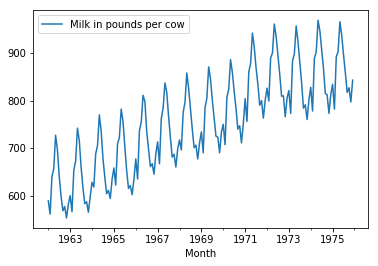

In [14]:
df.plot()

In [15]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [16]:
timeseries=df['Milk in pounds per cow']

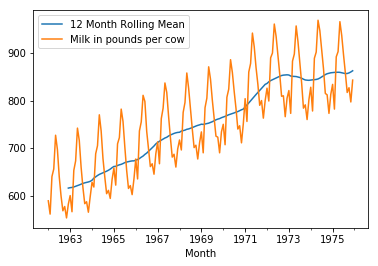

In [19]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')   #rolling is taking 12 vales and taking mean of it and plotting it
timeseries.plot()
plt.legend()

In [20]:
#ADF Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller


In [21]:
result=adfuller(df['Milk in pounds per cow'])

In [25]:
def adf_check(time_series):
    result=adfuller(time_series)
    print("Augmented Dickey Fuller test:")
    labels=['ADF Test Statistics','p-value','number of lags used','number of observation used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
        
    if result[1]<=0.05:
        print("Strong evidence against the null hypothesis,reject null hypothesis .Data is Stationary")
    else:
            print("Weak evidence against the null hypothesis,accept null hypothesis .Data is Non-Stationary")
            

In [26]:
adf_check(df['Milk in pounds per cow'])

Augmented Dickey Fuller test:
ADF Test Statistics:-1.303811587422133
p-value:0.6274267086030301
number of lags used:13
number of observation used:154
Weak evidence against the null hypothesis,accept null hypothesis .Data is Non-Stationary


In [29]:
#Differencing
df['Milk First Difference']=df['Milk in pounds per cow']- df['Milk in pounds per cow'].shift(1)

In [30]:
df['Milk First Difference']

Month
1962-01-01      NaN
1962-02-01    -28.0
1962-03-01     79.0
1962-04-01     16.0
1962-05-01     71.0
1962-06-01    -30.0
1962-07-01    -57.0
1962-08-01    -41.0
1962-09-01    -31.0
1962-10-01      9.0
1962-11-01    -24.0
1962-12-01     29.0
1963-01-01     18.0
1963-02-01    -34.0
1963-03-01     87.0
1963-04-01     20.0
1963-05-01     69.0
1963-06-01    -26.0
1963-07-01    -56.0
1963-08-01    -43.0
1963-09-01    -34.0
1963-10-01      4.0
1963-11-01    -22.0
1963-12-01     33.0
1964-01-01     30.0
1964-02-01    -10.0
1964-03-01     70.0
1964-04-01     17.0
1964-05-01     65.0
1964-06-01    -34.0
              ...  
1973-07-01    -43.0
1973-08-01    -44.0
1973-09-01    -53.0
1973-10-01      7.0
1973-11-01    -31.0
1973-12-01     42.0
1974-01-01     26.0
1974-02-01    -50.0
1974-03-01    111.0
1974-04-01     13.0
1974-05-01     67.0
1974-06-01    -22.0
1974-07-01    -39.0
1974-08-01    -41.0
1974-09-01    -52.0
1974-10-01     -3.0
1974-11-01    -39.0
1974-12-01     40.0
1975-01-01    

In [33]:
adf_check(df['Milk First Difference'].dropna())    #dropna to remove NAN value

Augmented Dickey Fuller test:
ADF Test Statistics:-3.0549955586530744
p-value:0.030068004001785296
number of lags used:14
number of observation used:152
Strong evidence against the null hypothesis,reject null hypothesis .Data is Stationary


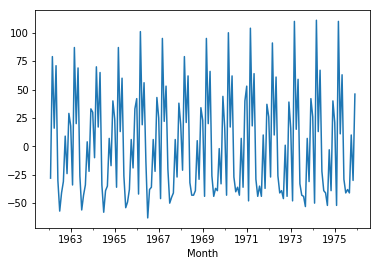

In [34]:
df['Milk First Difference'].plot()

In [35]:
#Now its stationary .. if its not then continue with same steps as above of df['Milk First Difference]... if still not stationary after 3-4 steps of diffrencing then check it for 1 year i.e.,shift(12)12 months

In [44]:
df['Milk First Seasonal']=df['Milk First Difference']- df['Milk First Difference'].shift(12)

In [45]:
df['Milk First Seasonal']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
1962-06-01     NaN
1962-07-01     NaN
1962-08-01     NaN
1962-09-01     NaN
1962-10-01     NaN
1962-11-01     NaN
1962-12-01     NaN
1963-01-01     NaN
1963-02-01    -6.0
1963-03-01     8.0
1963-04-01     4.0
1963-05-01    -2.0
1963-06-01     4.0
1963-07-01     1.0
1963-08-01    -2.0
1963-09-01    -3.0
1963-10-01    -5.0
1963-11-01     2.0
1963-12-01     4.0
1964-01-01    12.0
1964-02-01    24.0
1964-03-01   -17.0
1964-04-01    -3.0
1964-05-01    -4.0
1964-06-01    -8.0
              ... 
1973-07-01    -2.0
1973-08-01    -5.0
1973-09-01    -7.0
1973-10-01     6.0
1973-11-01    13.0
1973-12-01     3.0
1974-01-01    10.0
1974-02-01    -2.0
1974-03-01     1.0
1974-04-01    -2.0
1974-05-01     8.0
1974-06-01    11.0
1974-07-01     4.0
1974-08-01     3.0
1974-09-01     1.0
1974-10-01   -10.0
1974-11-01    -8.0
1974-12-01    -2.0
1975-01-01    -5.0
1975-02-01    -2.0
1975-03-01    -1.0
1975-0

In [46]:
adf_check(df['Milk First Seasonal'].dropna())

Augmented Dickey Fuller test:
ADF Test Statistics:-5.038002274921981
p-value:1.865423431878848e-05
number of lags used:11
number of observation used:143
Strong evidence against the null hypothesis,reject null hypothesis .Data is Stationary


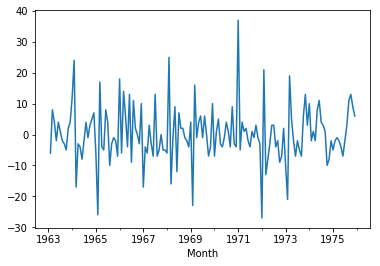

In [47]:
df['Milk First Seasonal'].plot()

In [50]:
#ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [51]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |  If exogenous variables are given, then the model that is fit is
 

In [56]:
model=sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(1,0,0),seasonal_order=(1,1,1,12))
results=model.fit()

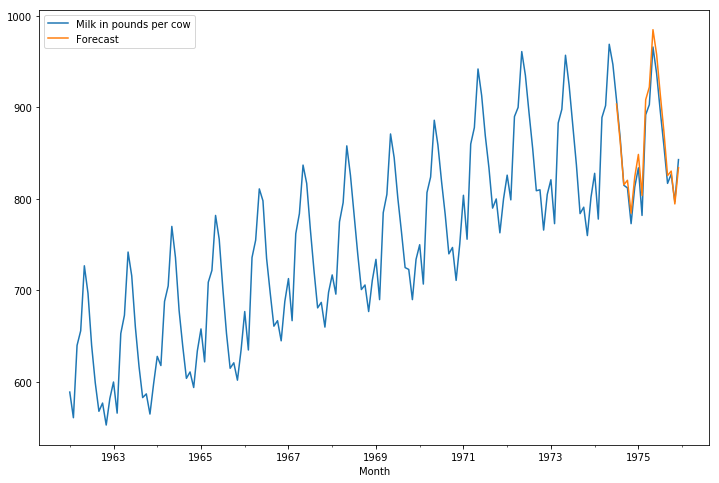

In [62]:
df['Forecast']=results.predict(start=150,end=168,dynamic=True)
df[['Milk in pounds per cow','Forecast']].plot(figsize=(12,8))

In [64]:
from pandas.tseries.offsets import DateOffset

In [67]:
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [69]:
type(future_dates)

list

In [71]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [72]:
future_datest_df.head()

,Milk in pounds per cow,Milk Difference,Milk First Difference,Milk First Seasonal,Milk Second Seasonal,Forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
future_df=pd.concat([df,future_datest_df])

In [74]:
future_df.tail()

,Milk in pounds per cow,Milk Difference,Milk First Difference,Milk First Seasonal,Milk Second Seasonal,Forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


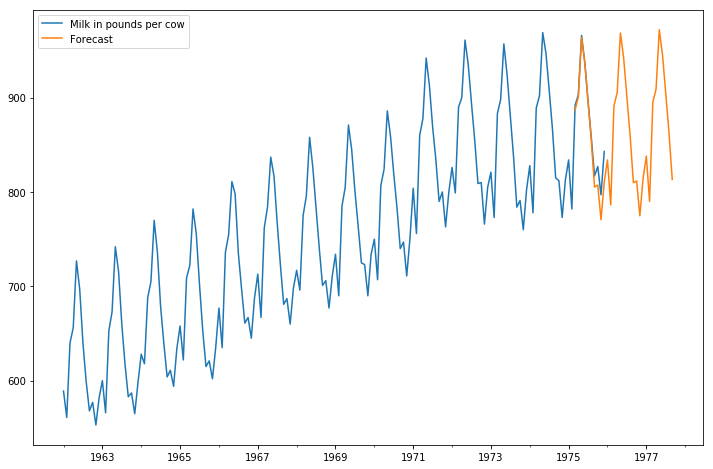

In [77]:
future_df['Forecast']=results.predict(start=158,end=188,dynamic=True)
future_df[['Milk in pounds per cow','Forecast']].plot(figsize=(12,8))